In [1]:
from dipy.reconst.ivim import IvimModel
from dipy.data.fetcher import read_ivim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
img, gtab = read_ivim()
data = img.get_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /home/shahnawaz/.dipy/ivim 


In [16]:
z = 32
data_slice = data[105:108, 100:115,z, :]
plt.imshow(data_slice[..., 0].T, origin='lower', cmap = 'gray', interpolation ='nearest')
plt.show()

In [9]:
del data, img
mask = data_slice[..., 0] > 5.

In [10]:
model = IvimModel(gtab, split_b_D =200., split_b_S0=500, scaling=[10e-3, 10., 1000., 10000.])
fit = model.fit(data_slice, mask=mask)

/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:47: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-b * D_star) + (1 - f) * np.exp(-b * D))
/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:47: RuntimeWarning: overflow encountered in multiply
  S = S0 * (f * np.exp(-b * D_star) + (1 - f) * np.exp(-b * D))


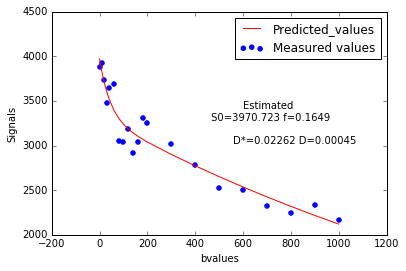

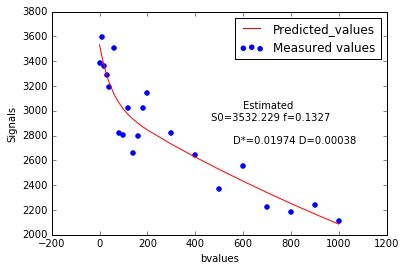

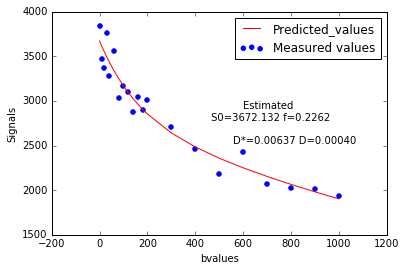

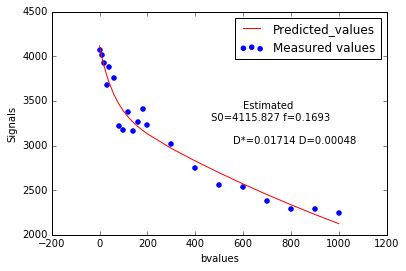

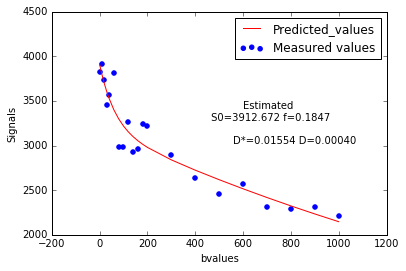

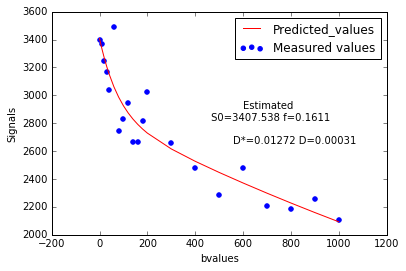

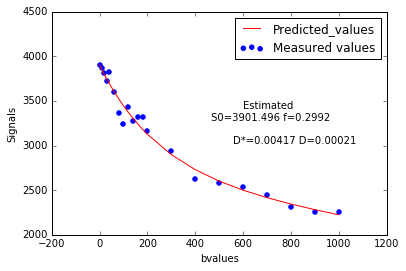

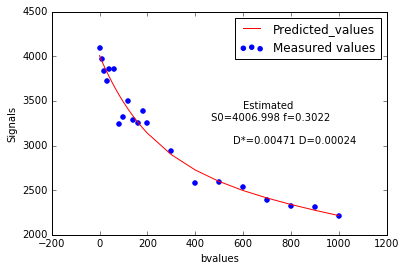

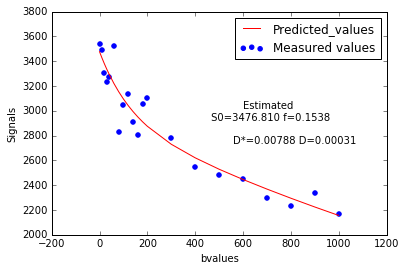

In [11]:
def plot_fits(x,y):
    plt.plot(gtab.bvals, fit.predict(gtab)[x,y], color = "red", label= "Predicted_values")
    plt.scatter(gtab.bvals, data_slice[x,y], color="blue", label="Measured values")
    plt.xlabel("bvalues")
    plt.ylabel("Signals")

    S0_est, f_est, D_star_est, D_est = fit.model_params[x,y]
    text_fit = """Estimated \n S0={:06.3f} f={:06.4f}\n
                D*={:06.5f} D={:06.5f}""".format(S0_est, f_est, D_star_est, D_est)

    plt.text(0.65, 0.50, text_fit, horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes)
    plt.legend(loc='upper right')
    plt.legend()
#     plt.savefig("plot2/"+str(x)+str(y)+".png")
    plt.show()
    plt.close()
for i in range(3):
    for j in range(3):
        plot_fits(i,j)

In [14]:
def plot_map(raw_data, variable, limits, filename):
    lower, upper = limits
    plt.title('Map for {}'.format(variable))
    plt.imshow(raw_data.T, origin='lower', clim=(lower, upper), cmap="gray", interpolation='nearest')
    plt.colorbar()
    plt.show()
#     plt.savefig(filename + ".png")
    plt.close()
    
# filtered =np.ma.masked_where(( fit.perfusion_fraction > 0.3 ), fit.perfusion_fraction)
plot_map(fit.perfusion_fraction, "f", (0., .5),
         "signal")